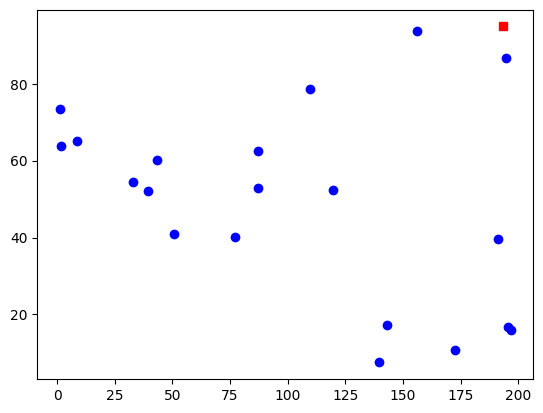

In [1]:
# Capacitated Vehicle Routing Problem with Gurobi
# The Gurobi Optimizer is a mathematical optimization software library for solving mixed-integer linear and quadratic optimization problems.
import numpy as np
import matplotlib.pyplot as plt

# Setting random seed for reproductivity
rnd = np.random
rnd.seed(4)

# Number of clients (excluding depot)
n = 20

# Generate random coordinates for depot and clients
xc = rnd.rand(n+1)*200 # x coordinates
yc = rnd.rand(n+1)*100 # y coordinates

# Plotting the depot and clients
plt.plot(xc[0], yc[0], c='r', marker='s') # Depot
plt.scatter(xc[1:], yc[1:], c='b') # Clients

In [57]:
# Define set of nodes and vehicles
N = [i for i in range(1, n+1)] # Clients
V = [0] + N # Nodes (depot and clients)

# Define set of arcs (edges) between nodes
A = [(i, j) for i in V for j in V if i != j]

# Calculate distance matrix using eulidean distance
c = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in A}

# Define vehicle capacity and demand for each client
Q = 20 # Vehicle capacity
q = {i: rnd.randint(1, 10) for i in N} # Demand of each client

In [58]:
from gurobipy import Model, GRB, quicksum

# Create gurobi model
mdl = Model('CVRP')

# Define decision variables
x = mdl.addVars(A, vtype=GRB.BINARY) # Binary decision variable indicating if arc (i, j) is used
u = mdl.addVars(N, vtype=GRB.CONTINUOUS) # Continuous decision variable representing the cumulative load at each node

In [59]:
# Set objective function: minimize total distance
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(x[i, j] * c[i, j] for i, j in A))

# Add constraints
mdl.addConstrs(quicksum(x[i, j] for j in V if j != i) == 1 for i in N) # Each client is visited exactly once
mdl.addConstrs(quicksum(x[i, j] for i in V if i != j) == 1 for j in N) # Each client is departed from exactly once
mdl.addConstrs((x[i, j] == 1) >> (u[i] + q[j] == u[j]) for i, j in A if i != 0 and j != 0)  # Flow constraint
mdl.addConstrs(u[i] >= q[i] for i in N) # Demand constraint: sufficient capacity at each node
mdl.addConstrs(u[i] <= Q for i in N) # Vehicle capacity constraint

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>}

Set parameter MIPGap to value 0.1
Set parameter TimeLimit to value 30
Gurobi Optimizer version 11.0.2 build v11.0.2rc0 (win64 - Windows 10.0 (19045.2))

CPU model: 12th Gen Intel(R) Core(TM) i7-1255U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 80 rows, 440 columns and 840 nonzeros
Model fingerprint: 0x96ef1f15
Model has 380 general constraints
Variable types: 20 continuous, 420 integer (420 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
  GenCon rhs range [1e+00, 9e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 718 rows and 117 columns
Presolve time: 0.29s
Presolved: 798 rows, 557 columns, 3247 nonzeros
Variable types: 137 continuous, 420 integer (420 binary)
Found heuristic solution: objective 2743.6298303
Found heuristic solution: objective 2722.7469439
Found heuristic

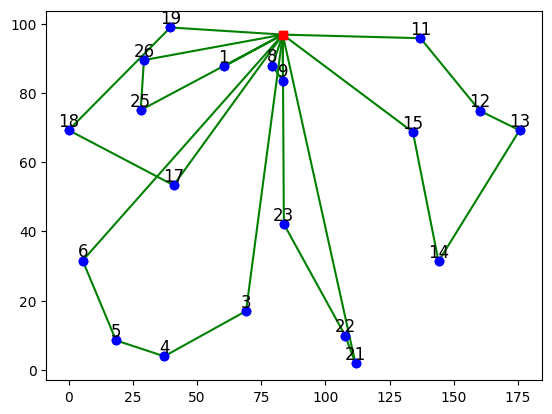

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from gurobipy import Model, GRB, quicksum

# Initialize random seed for reproducibility
rnd = np.random
rnd.seed(1)

# Number of clients (excluding depot)
n = 20

# Generate random coordinates for depot and clients
xc = rnd.rand(n+1) * 200  # x-coordinates (depot + clients)
yc = rnd.rand(n+1) * 100  # y-coordinates (depot + clients)

# Plotting the depot (red square) and clients (blue dots)
plt.plot(xc[0], yc[0], c='r', marker='s')  # Depot
plt.scatter(xc[1:], yc[1:], c='b')         # Clients

# Define set of nodes and vehicles
N = [i for i in range(1, n+1)]  # Clients
V = [0] + N                     # Nodes (depot + clients)

# Define set of arcs (edges) between nodes
A = [(i, j) for i in V for j in V if i != j]

# Calculate distance matrix using Euclidean distance
c = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in A}

# Define vehicle capacity and demand for each client
Q = 20  # Vehicle capacity
q = {i: rnd.randint(1, 10) for i in N}  # Demand of each client

# Create a Gurobi model
mdl = Model('CVRP')

# Define decision variables
x = mdl.addVars(A, vtype=GRB.BINARY)       # Binary decision variable indicating if arc (i, j) is used
u = mdl.addVars(N, vtype=GRB.CONTINUOUS)   # Continuous decision variable representing the cumulative load at each node

# Set objective function: minimize total distance
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(x[i, j] * c[i, j] for i, j in A))

# Add constraints
mdl.addConstrs(quicksum(x[i, j] for j in V if j != i) == 1 for i in N)   # Each client is visited exactly once
mdl.addConstrs(quicksum(x[i, j] for i in V if i != j) == 1 for j in N)   # Each client is departed from exactly once
mdl.addConstrs((x[i, j] == 1) >> (u[i] + q[j] == u[j]) for i, j in A if i != 0 and j != 0)  # Flow constraint
mdl.addConstrs(u[i] >= q[i] for i in N)    # Demand constraint: sufficient capacity at each node
mdl.addConstrs(u[i] <= Q for i in N)       # Vehicle capacity constraint

# Set parameters and solve the model
mdl.Params.MIPGap = 0.1    # Allowable gap for MIP (Mixed Integer Programming) solutions
mdl.Params.TimeLimit = 30  # Time limit for optimization process (in seconds)
mdl.optimize()

# Extract active arcs (edges) from the optimized solution
active_arcs = [a for a in A if x[a].x > 0.99]

# Determine the visitation order for customers
visit_order = []
current_node = 0  # Start from the depot
while active_arcs:
    for i, (start, end) in enumerate(active_arcs):
        if start == current_node:
            visit_order.append(end)
            current_node = end
            del active_arcs[i]
            break

# Print the visitation order
print("Visitation order of customers:", visit_order)

# Plot the optimized route with visitation sequence numbers starting from 1 (exclude depot from numbering)
for idx, (i, j) in enumerate(zip([0] + visit_order[:-1], visit_order)):  # Include depot in the sequence
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', zorder=0)  # Green lines for optimized routes
    # Annotate the node with the visitation sequence number starting from 1 for customers
    if j != 0:  # Skip the depot in numbering
        plt.text(xc[j], yc[j], str(idx + 1), fontsize=12, ha='center', va='bottom', color='black')

# Plotting the depot and customers
plt.plot(xc[0], yc[0], c='r', marker='s')  # Depot
plt.scatter(xc[1:], yc[1:], c='b')         # Customers

# Show the plot
plt.show()
